In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px 
from sklearn.model_selection import train_test_split
import os 


In [2]:
pwd

'D:\\cointab project\\eda+data_cleaning'

In [3]:
os.listdir()

['.ipynb_checkpoints',
 'census_starter.csv',
 'godaddy-microbusiness-density-forecasting-privateleaderboard-2024-05-04T13_18_05.csv',
 'godaddy.ipynb',
 'microbusiness_density_predictor.ipynb',
 'revealed_test.csv',
 'sample_submission.csv',
 'test.csv',
 'train.csv',
 'Untitled.ipynb']

In [4]:
dfs=[]
for i in os.listdir():
    if i.endswith(".csv"):
        df=pd.read_csv(i)
        dfs.append(df)

In [5]:
df1=dfs[0]
df2=dfs[2]
df3=dfs[3]
df4=dfs[4]
df5=dfs[5]

In [6]:
df1.head(1)

,pct_bb_2017,pct_bb_2018,pct_bb_2019,pct_bb_2020,pct_bb_2021,cfips,pct_college_2017,pct_college_2018,pct_college_2019,pct_college_2020,...,pct_it_workers_2017,pct_it_workers_2018,pct_it_workers_2019,pct_it_workers_2020,pct_it_workers_2021,median_hh_inc_2017,median_hh_inc_2018,median_hh_inc_2019,median_hh_inc_2020,median_hh_inc_2021
0,76.6,78.9,80.6,82.7,85.5,1001,14.5,15.9,16.1,16.7,...,1.3,1.1,0.7,0.6,1.1,55317,58786.0,58731,57982.0,62660.0


In [7]:
df2.head(1)

,row_id,cfips,county,state,first_day_of_month,microbusiness_density,active
0,1001_2022-11-01,1001,Autauga County,Alabama,2022-11-01,3.442677,1463


In [8]:
df3.head(1)

,row_id,microbusiness_density
0,1001_2022-11-01,3.817671


In [9]:
df4.head(1)

,row_id,cfips,first_day_of_month
0,1001_2022-11-01,1001,2022-11-01


In [10]:
df5.head(1)

,row_id,cfips,county,state,first_day_of_month,microbusiness_density,active
0,1001_2019-08-01,1001,Autauga County,Alabama,2019-08-01,3.007682,1249


In [11]:
for i in dfs:
    print(i.shape)

(3142, 26)
(3386, 7)
(6270, 7)
(25080, 2)
(25080, 3)
(122265, 7)


In [12]:
df25=pd.concat([df5,df2],axis=0)

In [13]:
df1=pd.melt(df1,id_vars=['cfips'],value_vars=['pct_bb_2017', 'pct_bb_2018', 'pct_bb_2019', 'pct_bb_2020',
       'pct_bb_2021', 'cfips', 'pct_college_2017', 'pct_college_2018',
       'pct_college_2019', 'pct_college_2020', 'pct_college_2021',
       'pct_foreign_born_2017', 'pct_foreign_born_2018',
       'pct_foreign_born_2019', 'pct_foreign_born_2020',
       'pct_foreign_born_2021', 'pct_it_workers_2017', 'pct_it_workers_2018',
       'pct_it_workers_2019', 'pct_it_workers_2020', 'pct_it_workers_2021',
       'median_hh_inc_2017', 'median_hh_inc_2018', 'median_hh_inc_2019',
       'median_hh_inc_2020', 'median_hh_inc_2021']).rename(columns={"value":"Score","variable":"Details"},)
df1

,cfips,Details,Score
0,1001,pct_bb_2017,76.6
1,1003,pct_bb_2017,74.5
2,1005,pct_bb_2017,57.2
3,1007,pct_bb_2017,62.0
4,1009,pct_bb_2017,65.8
...,...,...,...
78545,56037,median_hh_inc_2021,76668.0
78546,56039,median_hh_inc_2021,94498.0
78547,56041,median_hh_inc_2021,75106.0
78548,56043,median_hh_inc_2021,62271.0


In [14]:
df1["Year"]= [i[-4:] for i in df1["Details"]]

In [15]:
df1["Categories"]= [i[:-5] for i in df1["Details"]]

In [16]:
df1["Categories"].unique()

array(['pct_bb', 'pct_college', 'pct_foreign_born', 'pct_it_workers',
       'median_hh_inc'], dtype=object)

In [17]:
for i in  dfs:
    i.drop_duplicates(inplace=True)


In [18]:
complete_df=pd.merge(df25,df1,on='cfips',how='left')

# EDA

# view 

In [19]:
complete_df.columns

Index(['row_id', 'cfips', 'county', 'state', 'first_day_of_month',
       'microbusiness_density', 'active', 'Details', 'Score', 'Year',
       'Categories'],
      dtype='object')

In [20]:
complete_df.shape

(3213375, 11)

In [21]:
complete_df.size

35347125

In [22]:
complete_df['cfips']=complete_df['cfips'].astype(str)

In [23]:
complete_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3213375 entries, 0 to 3213374
Data columns (total 11 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   row_id                 object 
 1   cfips                  object 
 2   county                 object 
 3   state                  object 
 4   first_day_of_month     object 
 5   microbusiness_density  float64
 6   active                 int64  
 7   Details                object 
 8   Score                  float64
 9   Year                   object 
 10  Categories             object 
dtypes: float64(2), int64(1), object(8)
memory usage: 269.7+ MB


In [24]:
complete_df.describe().T # numeric_data

,count,mean,std,min,25%,50%,75%,max
microbusiness_density,3213375.0,3.827817,5.059287,0.0,1.642628,2.59142,4.525961,2.843400e+02
active,3213375.0,6461.169277,33117.463910,0.0,145.000000,490.00000,2127.000000,1.167744e+06
Score,3213211.0,10744.279637,22408.306000,0.0,2.100000,14.20000,82.300000,1.568210e+05


In [25]:
complete_df.describe(include='object').T

,count,unique,top,freq
row_id,3213375,128535,1001_2019-08-01,25
cfips,3213375,3135,1001,1025
county,3213375,1871,Washington County,30750
state,3213375,51,Texas,260350
first_day_of_month,3213375,41,2019-08-01,78375
Details,3213375,25,pct_bb_2017,128535
Year,3213375,5,2017,642675
Categories,3213375,5,pct_bb,642675


In [26]:
null_df=complete_df.isnull()
null_df.sum()

row_id                     0
cfips                      0
county                     0
state                      0
first_day_of_month         0
microbusiness_density      0
active                     0
Details                    0
Score                    164
Year                       0
Categories                 0
dtype: int64

In [27]:
# outlier

In [28]:
num_data=complete_df[[i for i in complete_df.columns if complete_df[i].dtypes!='object']]
cat_data=complete_df[[i for i in complete_df.columns if complete_df[i].dtypes=='object']]

<Axes: >

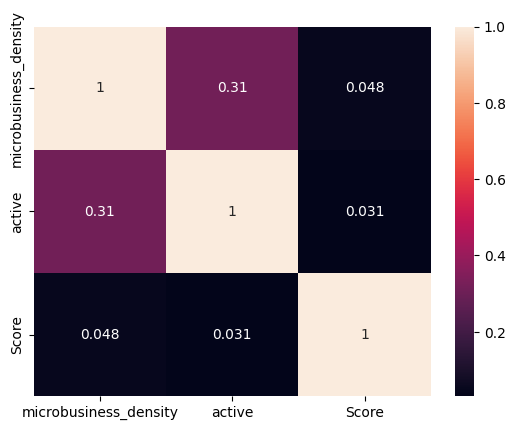

In [29]:
sns.heatmap(num_data.corr(),annot=True)

In [30]:
# pairplot

In [31]:
# parallel_cordinates categorical data

In [32]:
#px.parallel_coordinates(complete_df[["state","Year","Categories"]],color='state')

In [33]:
#sns.pairplot(num_data)

In [34]:
Q1=[num_data[i].quantile(0.25) for i in num_data.columns]
Q3=[num_data[i].quantile(0.75) for i in num_data.columns]

col=[i for i in num_data.columns]

In [35]:
IQR=pd.DataFrame({"columns":col,"Q1":Q1,"Q3":Q3})

In [36]:
IQR["IQR"]=IQR["Q3"]-IQR["Q1"]

In [37]:
IQR["Upper_fence"]=IQR["Q3"]+(IQR["IQR"]*1.5)
IQR["Lower_fence"]=IQR["Q1"]-(IQR["IQR"]*1.5)

In [38]:
IQR

,columns,Q1,Q3,IQR,Upper_fence,Lower_fence
0,microbusiness_density,1.642628,4.525961,2.883333,8.85096,-2.682371
1,active,145.000000,2127.000000,1982.000000,5100.00000,-2828.000000
2,Score,2.100000,82.300000,80.200000,202.60000,-118.200000


# treatment

In [39]:
from sklearn.preprocessing import StandardScaler

In [40]:
ss=StandardScaler()

In [41]:
for i in  complete_df.columns:
    if complete_df[i].dtypes !='object':
        complete_df[i+"_std"]=ss.fit_transform(complete_df[[i]])

In [42]:
for i in complete_df.columns:
    if i.endswith("_std"):
        global df2
        df2=complete_df[complete_df[i].between(-3,3)]

In [43]:
(df2.shape[0]/complete_df.shape[0])*100

98.76363636363637

In [44]:
for i in complete_df:
    if i in num_data.columns:
        global df
        df=complete_df[complete_df[i].between(complete_df[i].quantile(0.25)-((complete_df[i].quantile(0.75)-complete_df[i].quantile(0.25))*1.5),
                                             complete_df[i].quantile(0.75)+((complete_df[i].quantile(0.75)-complete_df[i].quantile(0.25))*1.5))]

In [45]:
(df.shape[0]/complete_df.shape[0])*100

79.99872408293461

In [46]:
df2.isnull().sum()

row_id                       0
cfips                        0
county                       0
state                        0
first_day_of_month           0
microbusiness_density        0
active                       0
Details                      0
Score                        0
Year                         0
Categories                   0
microbusiness_density_std    0
active_std                   0
Score_std                    0
dtype: int64

In [47]:
d=pd.DataFrame({"North":[100,100,105],"South":[200,200,208],"Category":["Furniture","Phone","Office"]})
d

,North,South,Category
0,100,200,Furniture
1,100,200,Phone
2,105,208,Office


In [48]:
pd.melt(d,id_vars="Category",value_vars=["North","South"]).rename(columns={"variable":"Region","value":"Sales"})

,Category,Region,Sales
0,Furniture,North,100
1,Phone,North,100
2,Office,North,105
3,Furniture,South,200
4,Phone,South,200
5,Office,South,208


In [49]:
[i for i in df.columns if df[i].isnull().sum()>0]

[]

In [50]:
# 1) mean / median /mode
# 2) ffill / bfill
# 3) domain specific knowledge
# 4) interpretation

# feature engineering

In [51]:
df2.drop(['microbusiness_density_std','active_std', 'Score_std'],axis=1,inplace=True)


C:\Users\Dell\AppData\Local\Temp\ipykernel_25604\298978132.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop(['microbusiness_density_std','active_std', 'Score_std'],axis=1,inplace=True)


In [52]:
df3=df2.copy()

In [53]:
from sklearn.preprocessing import LabelEncoder

In [54]:
for i in df2.columns:
    if df2[i].dtypes=="object":
        df2[i]=LabelEncoder().fit_transform(df2[i])

C:\Users\Dell\AppData\Local\Temp\ipykernel_25604\1325843948.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[i]=LabelEncoder().fit_transform(df2[i])
C:\Users\Dell\AppData\Local\Temp\ipykernel_25604\1325843948.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[i]=LabelEncoder().fit_transform(df2[i])
C:\Users\Dell\AppData\Local\Temp\ipykernel_25604\1325843948.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

<Axes: >

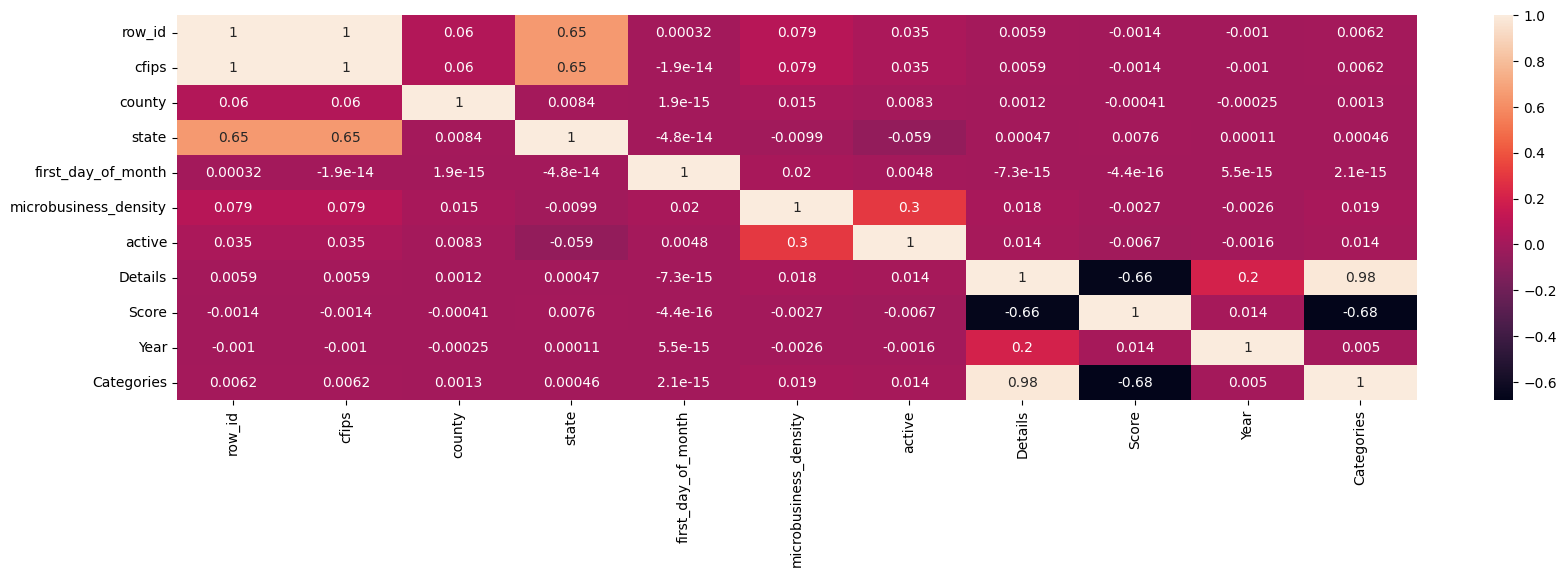

In [55]:
plt.figure(figsize=(20,5))
sns.heatmap(df2.corr(),annot=True)

In [56]:
import statsmodels.api as sm 
from statsmodels.formula.api import ols

In [57]:
cat_col=[ i for i in df3.columns if df3[i].dtypes=="object"]
cat_col

['row_id',
 'cfips',
 'county',
 'state',
 'first_day_of_month',
 'Details',
 'Year',
 'Categories']

In [58]:
df3["microbusiness_density"]=df3["microbusiness_density"].astype('int')

In [60]:
model=ols('microbusiness_density ~ C(row_id) + C(cfips) + C(row_id):C(cfips)' ,data=df3.iloc[:10000,:]).fit()

In [61]:
sm.stats.anova_lm(model,type=2)
        

,df,sum_sq,mean_sq,F,PR(>F)
C(row_id),399.0,3.891600e+04,9.753383e+01,4.089421e+05,0.0
C(cfips),10.0,2.409115e-22,2.409115e-23,1.010099e-19,1.0
C(row_id):C(cfips),3990.0,7.764394e-24,1.945964e-27,8.159081e-24,1.0
Residual,9600.0,2.289627e+00,2.385028e-04,NaN,NaN


In [63]:
df2.drop(["row_id","cfips"],axis=1,inplace=True)

C:\Users\Dell\AppData\Local\Temp\ipykernel_25604\1638331098.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop(["row_id","cfips"],axis=1,inplace=True)


In [64]:
df2

,county,state,first_day_of_month,microbusiness_density,active,Details,Score,Year,Categories
0,82,0,0,3.007682,1249,5,76.6,0,1
1,82,0,0,3.007682,1249,6,78.9,1,1
2,82,0,0,3.007682,1249,7,80.6,2,1
3,82,0,0,3.007682,1249,8,82.7,3,1
4,82,0,0,3.007682,1249,9,85.5,4,1
...,...,...,...,...,...,...,...,...,...
3213370,1793,50,40,1.803249,101,0,59605.0,0,0
3213371,1793,50,40,1.803249,101,1,52867.0,1,0
3213372,1793,50,40,1.803249,101,2,57031.0,2,0
3213373,1793,50,40,1.803249,101,3,53333.0,3,0


In [71]:
# feature Scaling 

In [66]:
y=df2.microbusiness_density

In [69]:
x=df2.drop("microbusiness_density",axis=1)

In [72]:
from sklearn.preprocessing import StandardScaler

In [73]:
ss=StandardScaler()

In [94]:
x_scaled=pd.DataFrame(ss.fit_transform(x))

# visualize

<Axes: xlabel='county', ylabel='microbusiness_density'>

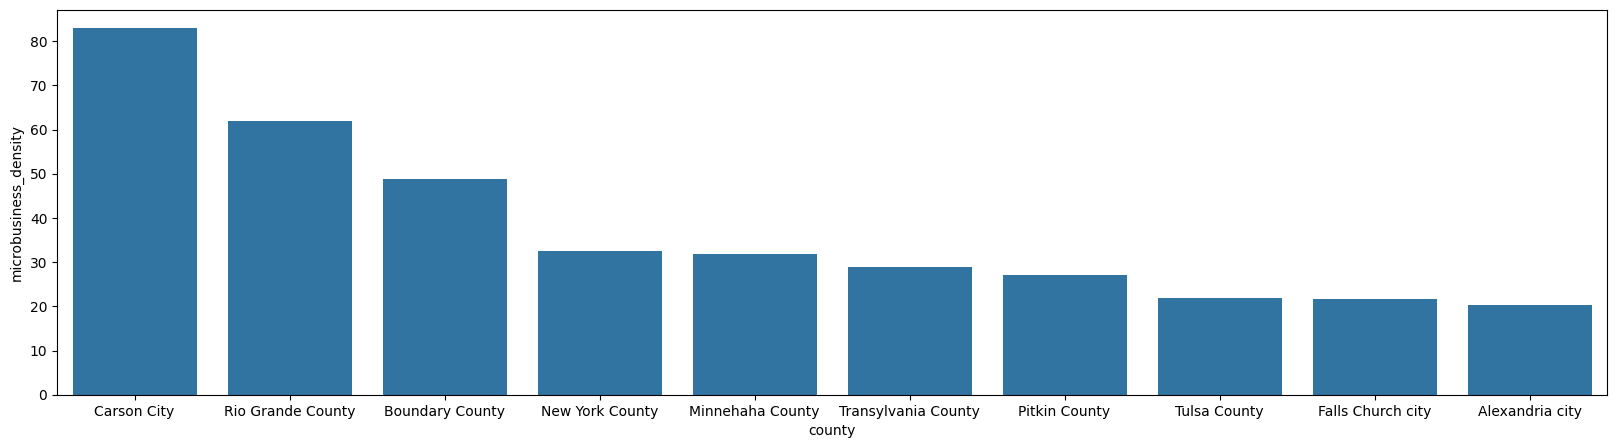

In [146]:
plt.figure(figsize=(20,5))
cwm=df3.groupby("county").agg({"microbusiness_density":"mean"}).sort_values("microbusiness_density").iloc[::-1,:].head(10) # top 10 county
sns.barplot(cwm["microbusiness_density"],label=cwm.index)

<Axes: xlabel='state', ylabel='microbusiness_density'>

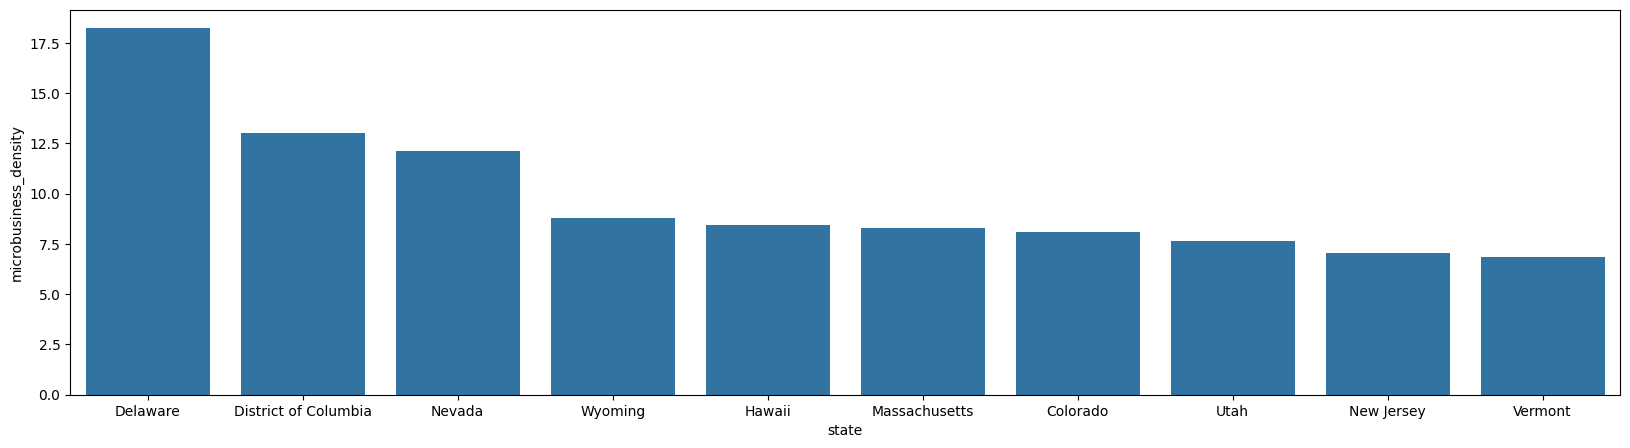

In [144]:
plt.figure(figsize=(20,5))
swm=df3.groupby("state").agg({"microbusiness_density":"mean"}).sort_values("microbusiness_density").iloc[::-1].iloc[:10]
sns.barplot(swm["microbusiness_density"],label=swm.index)

In [154]:
df3["Month"]=pd.to_datetime(df3["first_day_of_month"]).dt.month
df3.columns

Index(['row_id', 'cfips', 'county', 'state', 'first_day_of_month',
       'microbusiness_density', 'active', 'Details', 'Score', 'Year',
       'Categories', 'Month'],
      dtype='object')

In [168]:
mwm=df3.groupby("Month").agg({"microbusiness_density":"mean","Score":"mean","active":"mean"})

In [169]:
from sklearn.preprocessing import MinMaxScaler

In [170]:
mm=MinMaxScaler()

In [172]:
for i in ["microbusiness_density","Score","active"]:
    mwm[i+"_norm"]=mm.fit_transform(mwm[[i]])

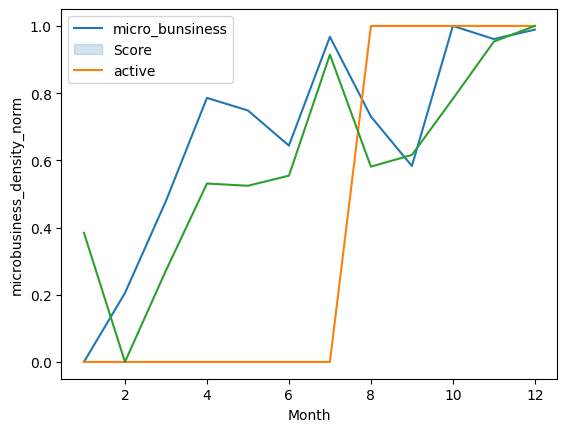

In [184]:
sns.lineplot(x=mwm.index,y=mwm["microbusiness_density_norm"],legend=True)
sns.lineplot(x=mwm.index,y=mwm["Score_norm"],legend=True)
sns.lineplot(x=mwm.index,y=mwm["active_norm"],legend=True)
plt.legend(labels=["micro_bunsiness","Score","active"])
plt.show()